# Universidad del Valle de Guatemala
# Deep Learning y Sistemas Inteligentes
<hr></hr>

## Proyecto Final
## Estudio y desarrollo de red neuronal para la clasificación de productos de tecnología, alimentos y mobiliario


### Autores:
Andres de la Roca - 20332  
Jun Woo Lee - 20358

In [44]:
# Cargando las librerias necesarias para el proyecto
import numpy as np
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(1)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
%matplotlib inline
import os
import shutil
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### Exploracion de la data

In [45]:
# Cargando los datos
modelpath = "./models/"
dataset = "./dataset/images/"
train_path = dataset + "train/"
test_path = dataset + "test/"

# Cambiar segun cantidad de datos
train_length = 40
train_length = train_length + 1
test_length = 10
test_length = test_length + 1

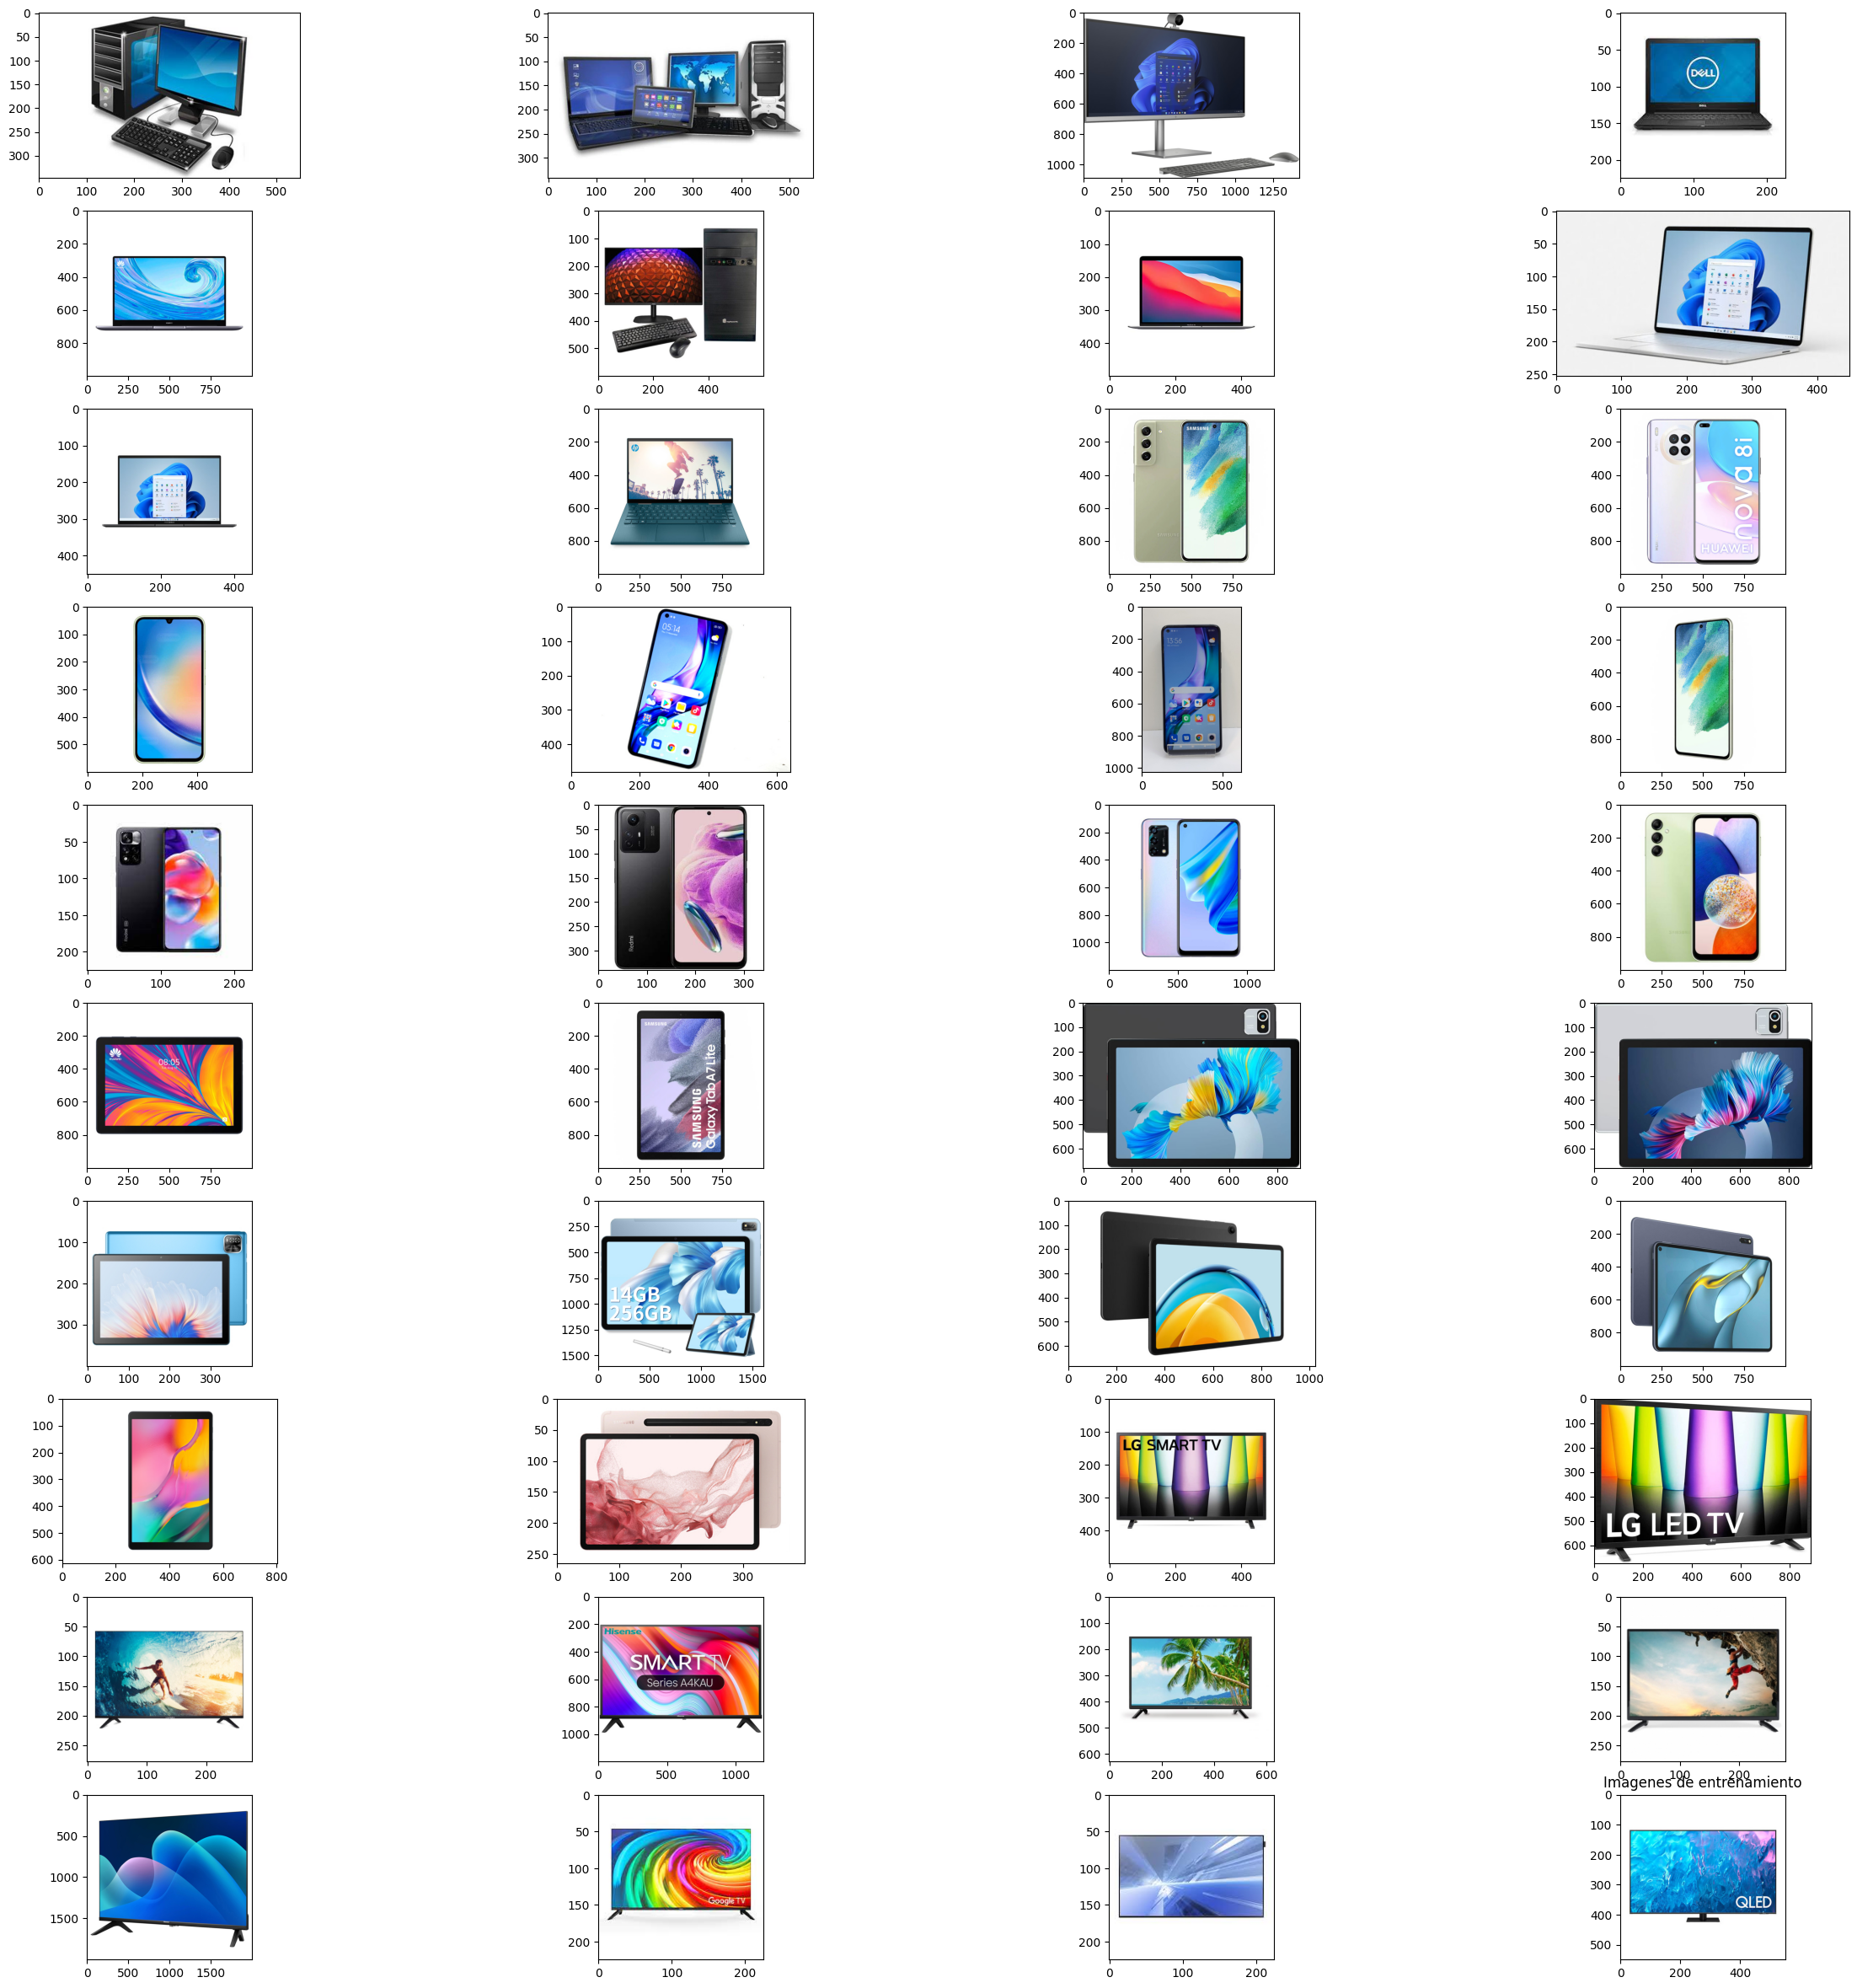

In [46]:
# Visualizando las imagenes de entrenaiento
plt.figure(figsize=(30, 30))
for i in range(1, train_length):
    plt.subplot(10, 4, i)
    plt.imshow(imread(train_path+"image"+str(i) + ".jpeg"))
    
plt.title("Imagenes de entrenamiento")
plt.show()

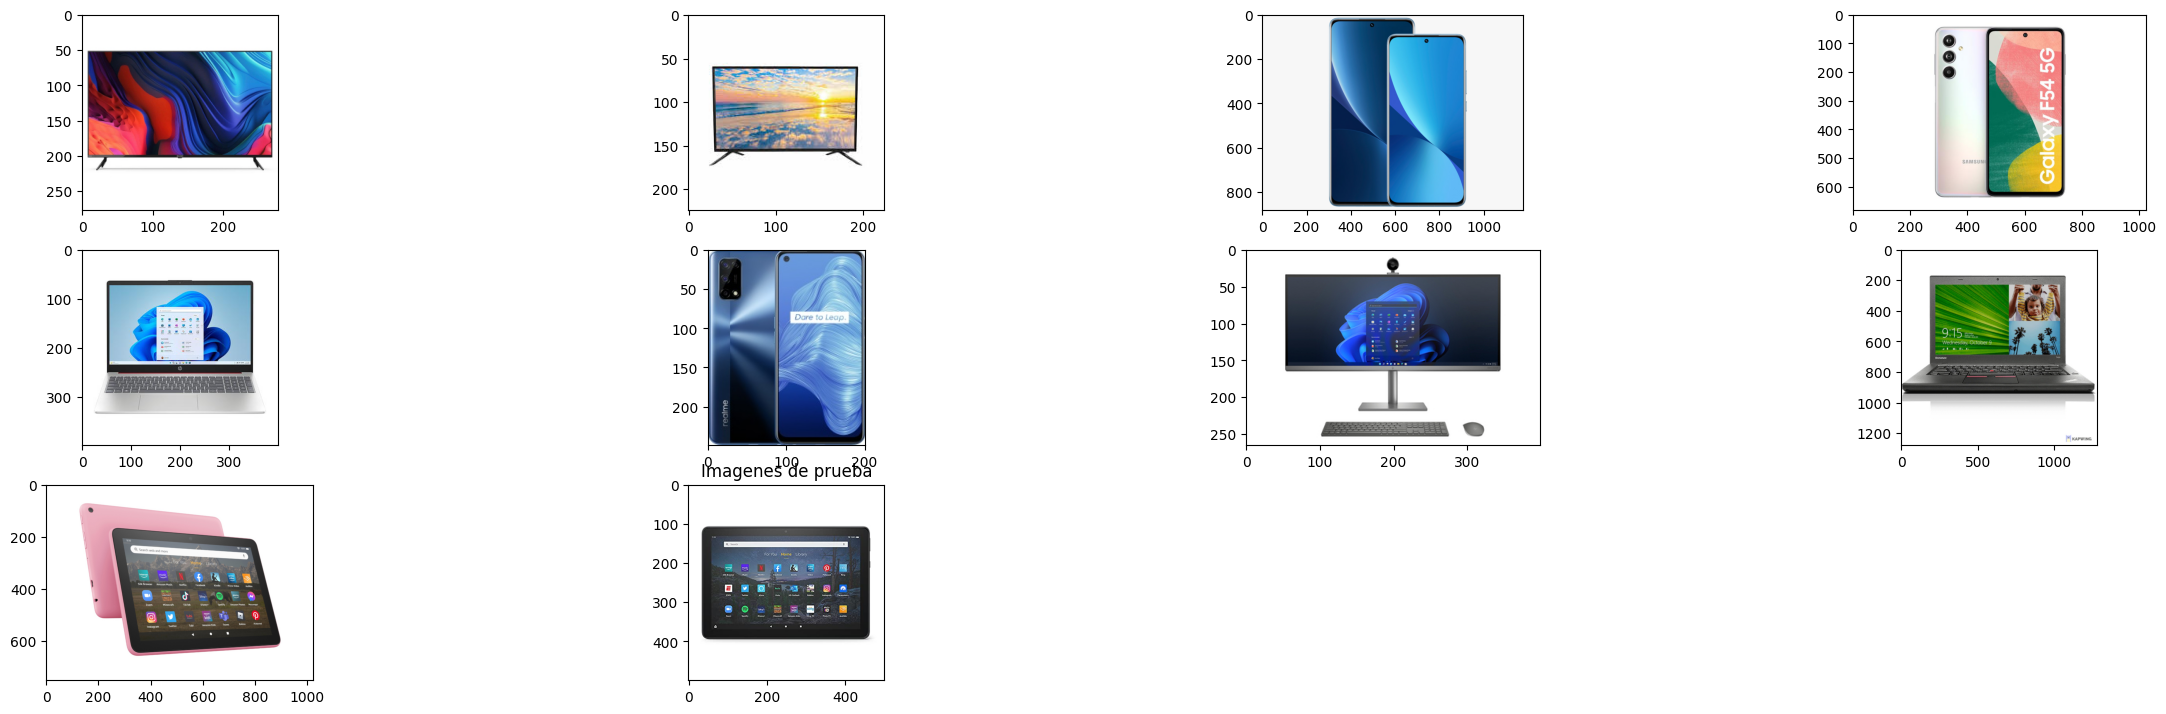

In [47]:
# Visualizando las imagenes de prueba
plt.figure(figsize=(30, 30))
for i in range(1, test_length):
    plt.subplot(10, 4, i)
    plt.imshow(imread(test_path+"test_image"+str(i) + ".jpeg"))

plt.title("Imagenes de prueba")
plt.show()

In [67]:
df_train = pd.read_csv("./dataset/train.csv")
df_test = pd.read_csv("./dataset/test.csv")

In [68]:
df_train

,name,category
0,image1,0
1,image2,0
2,image3,0
3,image4,0
4,image5,0
...,...,...
155,image156,3
156,image157,3
157,image158,3
158,image159,3


In [69]:
df_test

,name,category
0,test_image1,0
1,test_image2,0
2,test_image3,0
3,test_image4,0
4,test_image5,0
5,test_image6,0
6,test_image7,0
7,test_image8,0
8,test_image9,0
9,test_image10,0


In [70]:
labels=[0,1,2,3]
for i in range(len(labels)):
    label = str(i)
    try:
        os.mkdir(train_path + label)
        os.mkdir(test_path + label)
    except OSError:
        pass

In [71]:
# Copiando las imagenes a sus respectivas carpetas
def image_copy(df, path):
    for i in tqdm(range(len(df["name"]))):
        img = df["name"].iloc[i]
        if(df["category"].iloc[i]==0):
            shutil.copy(path+img+".jpeg",path+"0")
        elif(df["category"].iloc[i]==1):
            shutil.copy(path+img+".jpeg",path+"1")
        elif(df["category"].iloc[i]==2):
            shutil.copy(path+img+".jpeg",path+"2")
        elif(df["category"].iloc[i]==3):
            shutil.copy(path+img+".jpeg",path+"3")
    
    print("\nCopiado de imagenes completado para la carpeta: ", path)

image_copy(df_train, train_path)
image_copy(df_test, test_path)

 25%|██▌       | 40/160 [00:00<00:00, 412.37it/s]


FileNotFoundError: [Errno 2] No such file or directory: './dataset/images/train/image41.jpeg'

In [72]:
categories = {
    "0": "Tecnologia",
    "1": "Alimentos",
    "2": "Mobiliario",
    "3": "Prendas"
}

In [73]:
df_train["category"] = df_train["category"].astype(str)
df_test["category"] = df_test["category"].astype(str)

In [77]:
# Reemplazando los valores de las categorias por su nombre
df_train["category"] = df_train["category"].replace(categories)
df_test["category"] = df_test["category"].replace(categories)

In [78]:
df_train

,name,category
0,image1,Tecnologia
1,image2,Tecnologia
2,image3,Tecnologia
3,image4,Tecnologia
4,image5,Tecnologia
...,...,...
155,image156,Prendas
156,image157,Prendas
157,image158,Prendas
158,image159,Prendas


In [79]:
df_test

,name,category
0,test_image1,Tecnologia
1,test_image2,Tecnologia
2,test_image3,Tecnologia
3,test_image4,Tecnologia
4,test_image5,Tecnologia
5,test_image6,Tecnologia
6,test_image7,Tecnologia
7,test_image8,Tecnologia
8,test_image9,Tecnologia
9,test_image10,Tecnologia


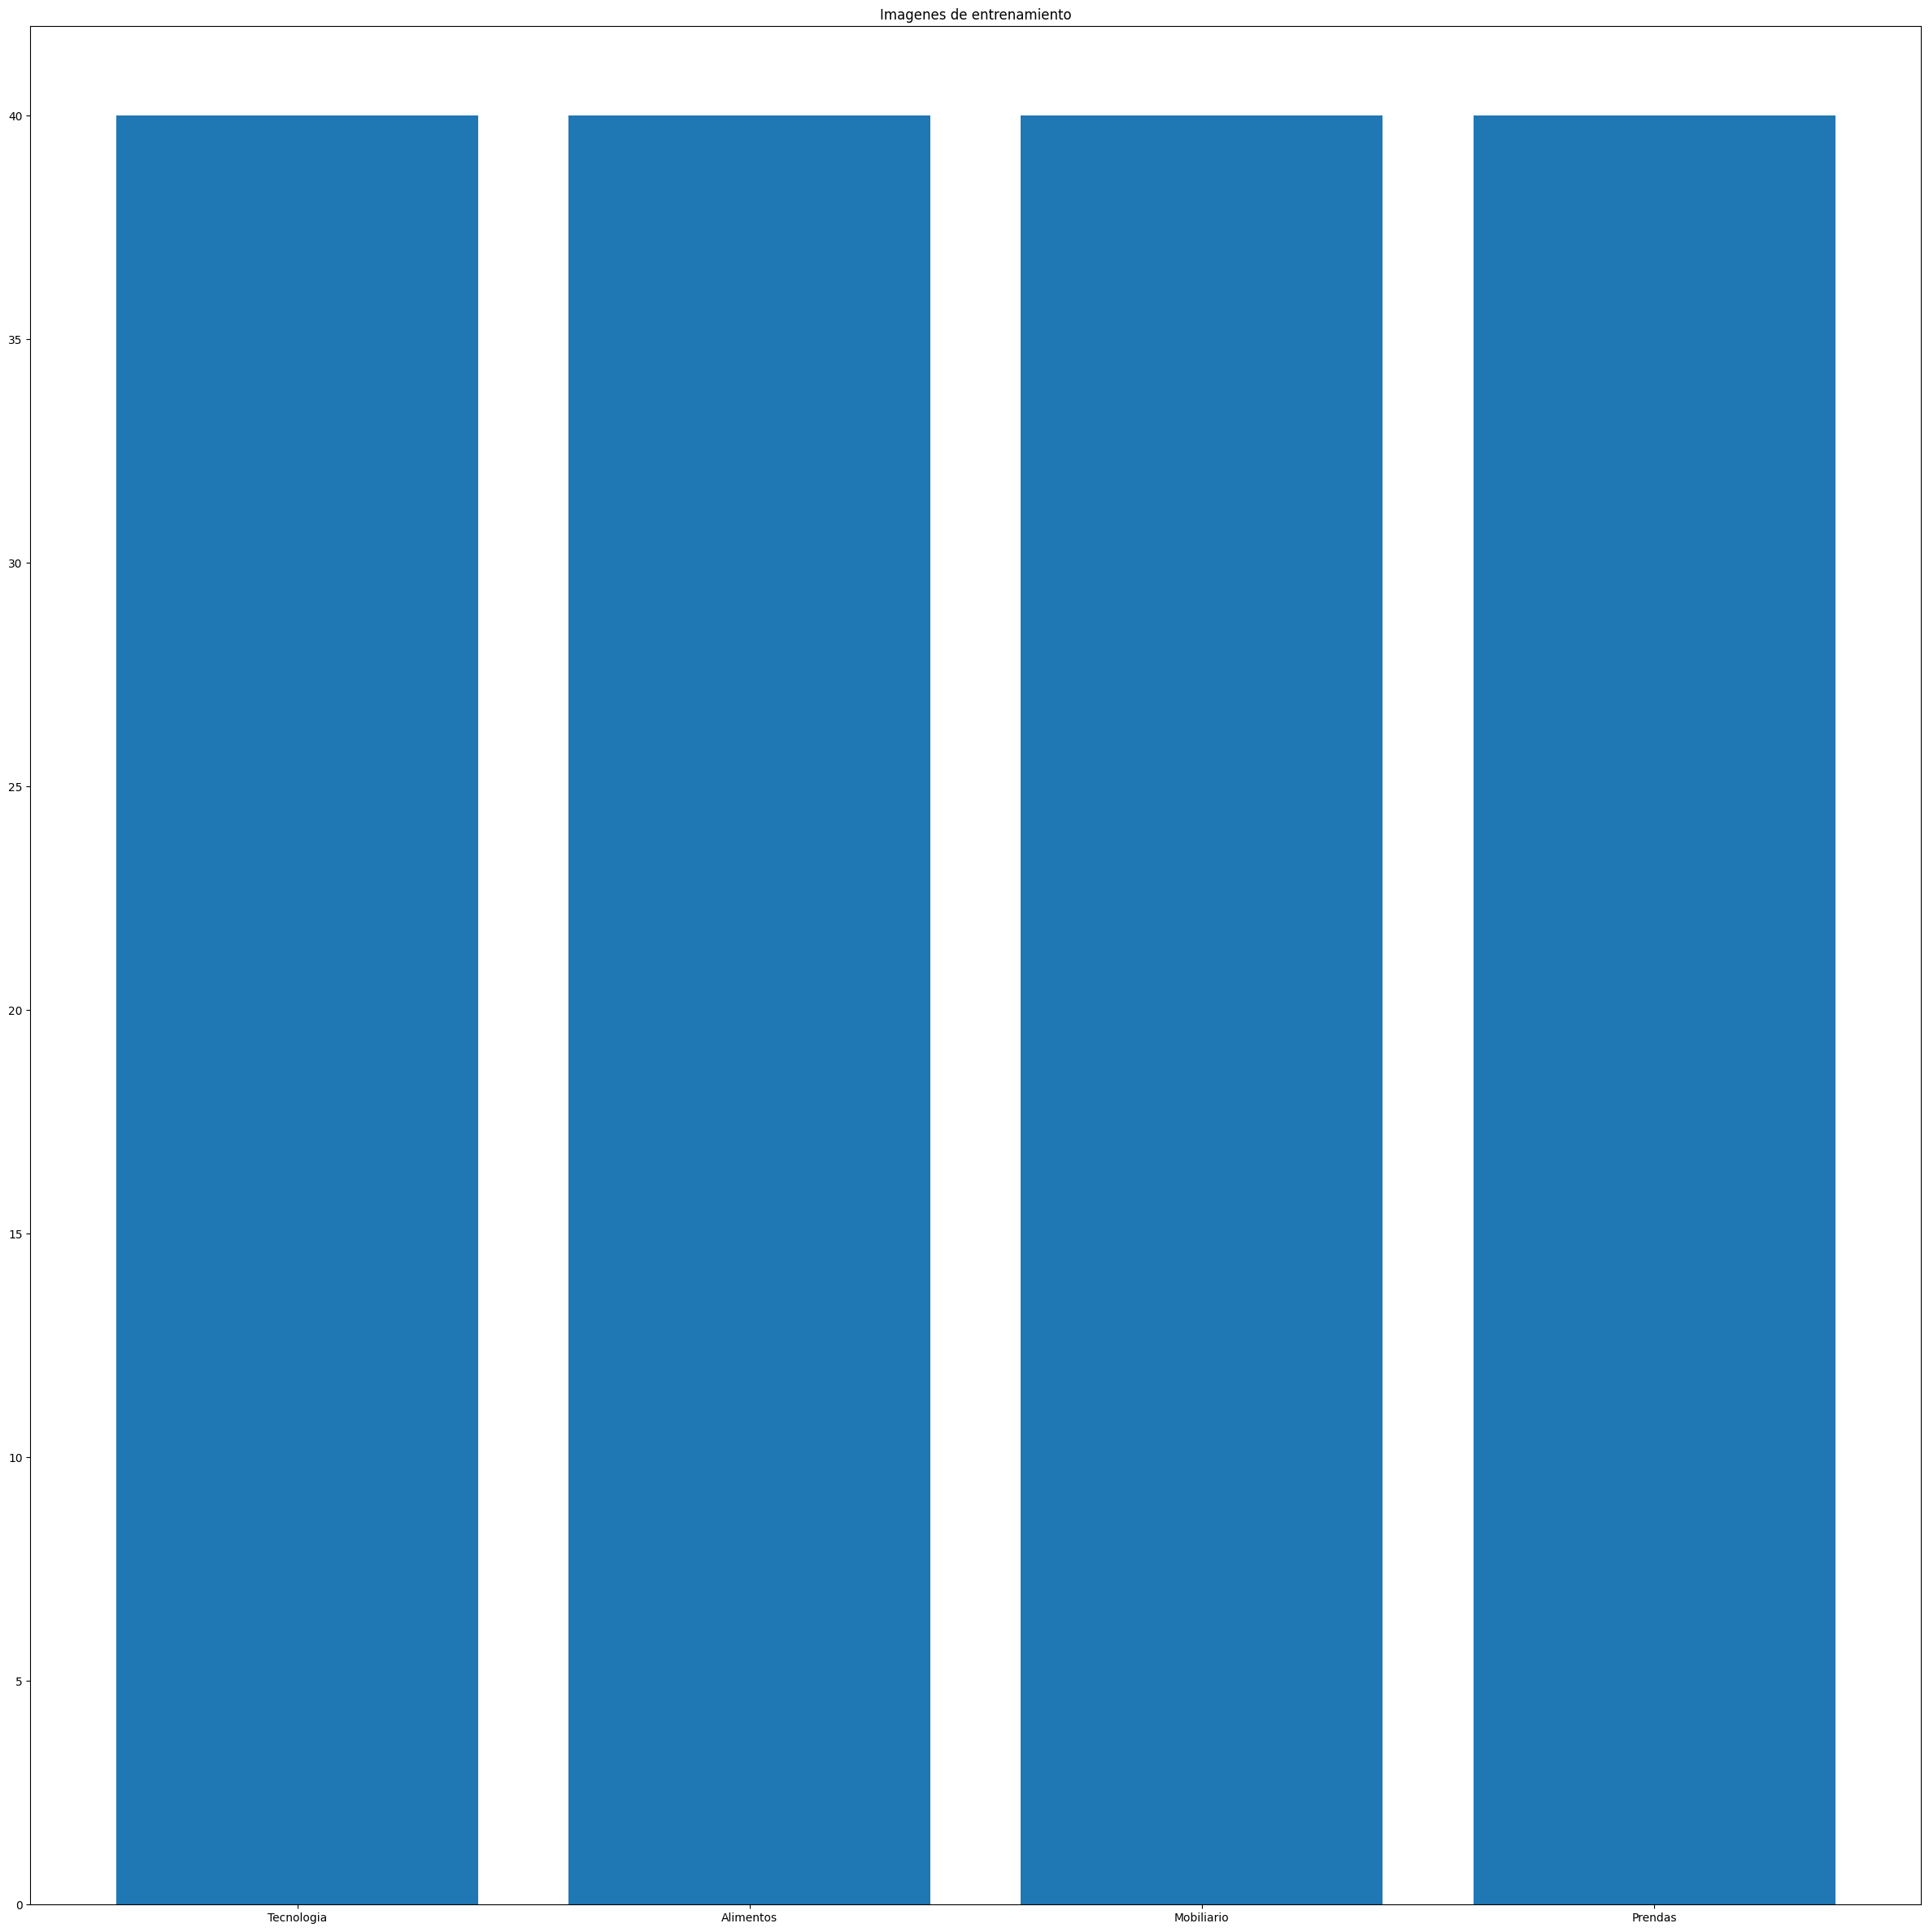

In [80]:
# Visualizando las imagenes de entrenaiento
plt.figure(figsize=(10, 10))
plt.bar(df_train["category"].value_counts().index, df_train["category"].value_counts())
plt.title("Imagenes de entrenamiento")
plt.show()

In [ ]:
# Visualizando las imagenes de prueba
plt.figure(figsize=(10, 10))
plt.bar(df_test["category"].value_counts().index, df_test["category"].value_counts())
plt.title("Imagenes de prueba")
plt.show()

### Entrenamiento de modelo

In [ ]:
# Funciones utiles
def plot_loss(history): # Funcion para graficar la perdida
  plt.plot(history.history['loss'], label='train loss')
  plt.plot(history.history['val_loss'], label='val loss')
  plt.legend()
  plt.show()

def plot_accuracy(history): # Funcion para graficar la precision
  plt.plot(history.history['accuracy'], label='train acc')
  plt.plot(history.history['val_accuracy'], label='val acc')
  plt.legend()
  plt.show()


In [ ]:
epochs = 10 # Numero de epocas

#### CNN (1 Capa Convolucional, 1 Capa Pooling)

In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation = 'relu', input_shape= (240, 205, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))
model1.compile(loss='binary_crossentropy',
optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),metrics = ['accuracy'])
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 238, 203, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 119, 101, 32)     0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 384608)            0         
                                                                 
 dense_16 (Dense)            (None, 64)                24614976  
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 24,615,937
Trainable params: 24,615,937
Non-trainable params: 0
__________________________________________

In [ ]:
# Aqui va el entrenamiento de model1

#### CNN (2 Capas Convolucionales, 2 Capas Pooling)

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape= (240, 205, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))
model2.compile(loss='binary_crossentropy',
optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),metrics = ['accuracy'])
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 238, 203, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 119, 101, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 117, 99, 64)       18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 58, 49, 64)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 181888)            0         
                                                                 
 dense_18 (Dense)            (None, 64)               

In [ ]:
# Aqui va el entrenamiento de model2

#### CNN (3 Capas Convolucionales, 3 Capas Pooling)

In [ ]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation = 'relu', input_shape= (240, 205, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))
model3.compile(loss='binary_crossentropy',
optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),metrics = ['accuracy'])
model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 238, 203, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 119, 101, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 117, 99, 64)       18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 58, 49, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 56, 47, 128)       73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 28, 23, 128)    

In [ ]:
# Aqui va el entrenamiento de model3

#### CNN (Transfer Learning)

In [ ]:
# Usar resnet50 para el modelo 4
# Cargando los pesos de resnet50
resnet = ResNet50(input_shape=imgSize + [3], weights='imagenet', include_top=False)
for i in resnet.layers:
    i.trainable=False
x = Flatten()(resnet.output)
prediction = Dense(1, activation='sigmoid')(x)
model4 = Model(inputs=resnet.input, outputs=prediction)
model4.summary()

NameError: name 'imgSize' is not defined

In [ ]:
# Aqui va el entrenamiento de model4

### Resultados Finales